# **Drive Mount**

In [ ]:
# prompt: how to link with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Ensemble Learning - Stacking (Blending)**



Stacking Classifier Accuracy: 0.92
Stacking Classifier Precision: 0.93
Stacking Classifier Recall: 0.92
Stacking Classifier F1 Score: 0.92


Decision_tree Accuracy: 0.92
Decision_tree Precision: 0.93
Decision_tree Recall: 0.92
Decision_tree F1 Score: 0.92


SVC Accuracy: 0.36
SVC Precision: 0.32
SVC Recall: 0.36
SVC F1 Score: 0.25


Logistic Accuracy: 0.49
Logistic Precision: 0.33
Logistic Recall: 0.49
Logistic F1 Score: 0.36




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


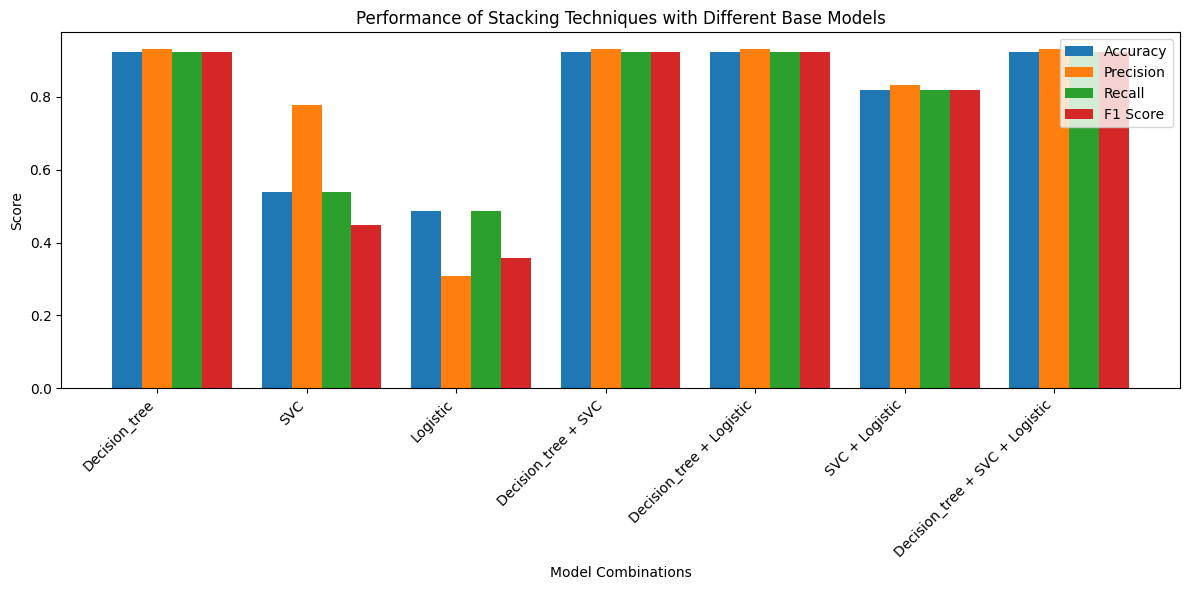

In [ ]:
# Import necessary libraries for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Base models (level-1 models in stacking)
base_models = [
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(probability=True)),
    ('Logistic', LogisticRegression())
]
print("\n")
# Meta-model (level-2 model in stacking)
meta_model = LogisticRegression()

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Stacking Classifier Accuracy: {accuracy:.2f}")
print(f"Stacking Classifier Precision: {precision:.2f}")
print(f"Stacking Classifier Recall: {recall:.2f}")
print(f"Stacking Classifier F1 Score: {f1:.2f}")
print("\n")
# Evaluate individual models
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)
    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
    recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
    f1_individual = f1_score(y_test, y_pred_individual, average='weighted')
    print(f"{name} Accuracy: {accuracy_individual:.2f}")
    print(f"{name} Precision: {precision_individual:.2f}")
    print(f"{name} Recall: {recall_individual:.2f}")
    print(f"{name} F1 Score: {f1_individual:.2f}")
    print("\n")

 # Create the chart
df_results = pd.DataFrame(results)

bar_width = 0.2
index = np.arange(len(df_results['Model Combination']))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, df_results['Accuracy'], bar_width, label='Accuracy')
ax.bar(index + bar_width, df_results['Precision'], bar_width, label='Precision')
ax.bar(index + 2 * bar_width, df_results['Recall'], bar_width, label='Recall')
ax.bar(index + 3 * bar_width, df_results['F1 Score'], bar_width, label='F1 Score')

ax.set_xlabel('Model Combinations')
ax.set_ylabel('Score')
ax.set_title('Performance of Stacking Techniques with Different Base Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_results['Model Combination'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Model Combination  Accuracy  Precision    Recall  F1 Score
0          Stacking  0.923077   0.930976  0.923077  0.923991
1     Decision_tree  0.923077   0.930976  0.923077  0.923991
2               SVC  0.358974   0.316952  0.358974  0.247409
3          Logistic  0.487179   0.330852  0.487179  0.364936


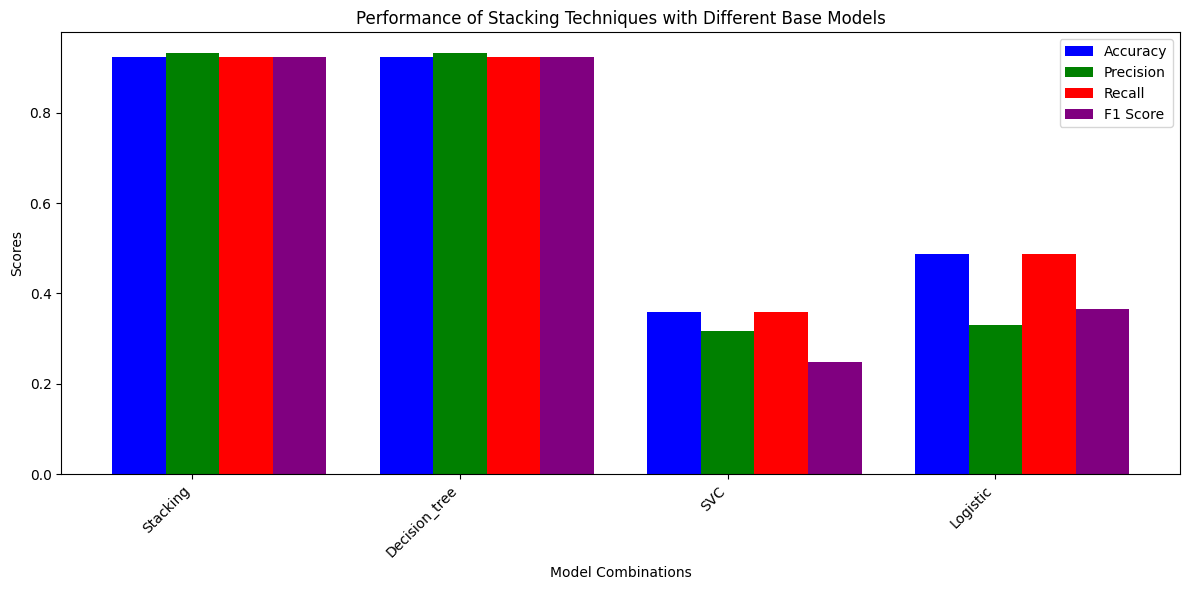

In [ ]:
# Import necessary libraries for classification and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Base models (level-1 models in stacking)
base_models = [
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(probability=True)),
    ('Logistic', LogisticRegression())
]

# Meta-model (level-2 model in stacking)
meta_model = LogisticRegression()

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the stacking model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store the results for the Stacking Classifier
results = [{
    'Model Combination': 'Stacking',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}]

# Evaluate individual base classifiers and store the results
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)

    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
    recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
    f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

    # Store the individual results
    results.append({
        'Model Combination': name,
        'Accuracy': accuracy_individual,
        'Precision': precision_individual,
        'Recall': recall_individual,
        'F1 Score': f1_individual
    })

# Convert the results into a DataFrame for easy visualization
df_results = pd.DataFrame(results)

# Print the results
print(df_results)

# Create the chart for visual comparison
bar_width = 0.2
index = np.arange(len(df_results['Model Combination']))

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
ax.bar(index, df_results['Accuracy'], bar_width, label='Accuracy', color='blue')
ax.bar(index + bar_width, df_results['Precision'], bar_width, label='Precision', color='green')
ax.bar(index + 2 * bar_width, df_results['Recall'], bar_width, label='Recall', color='red')
ax.bar(index + 3 * bar_width, df_results['F1 Score'], bar_width, label='F1 Score', color='purple')

# Configure chart details
ax.set_xlabel('Model Combinations')
ax.set_ylabel('Scores')
ax.set_title('Performance of Stacking Techniques with Different Base Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_results['Model Combination'], rotation=45, ha='right')
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


# **Ensemble Learning - Voting.**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

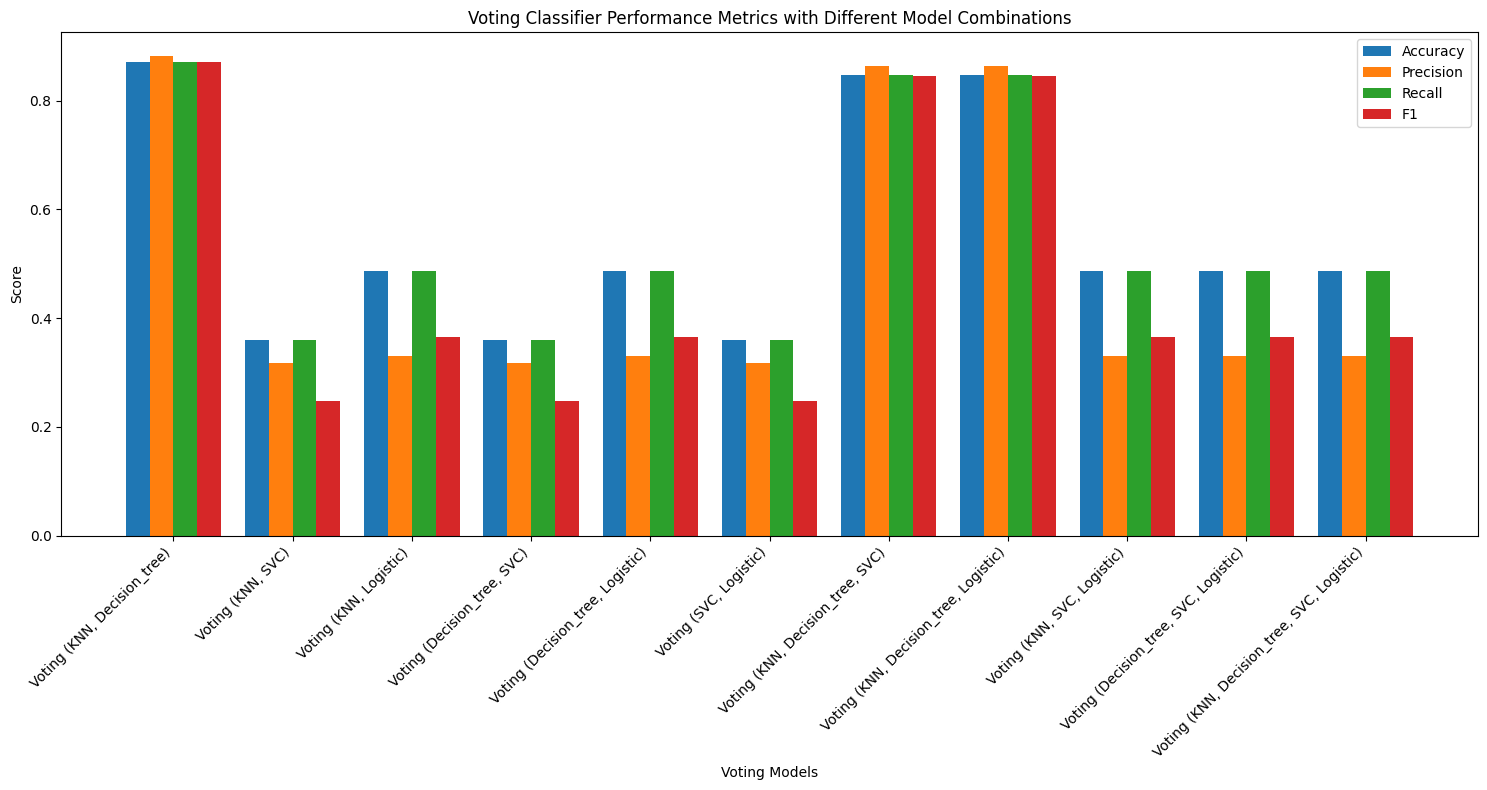

In [ ]:
# Import necessary libraries for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base models
base_models = [
    ('KNN', KNeighborsClassifier()),               # K-Nearest Neighbors
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),  # Decision Tree
    ('SVC', SVC(probability=True, random_state=42)),   # Support Vector Classifier
    ('Logistic', LogisticRegression(random_state=42))  # Logistic Regression
]

# Initialize the Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=base_models, voting='hard')

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print(f"Voting Classifier Precision: {precision:.2f}")
print(f"Voting Classifier Recall: {recall:.2f}")
print(f"Voting Classifier F1 Score: {f1:.2f}")

print("\n")

# Evaluate individual models
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)
    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
    recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
    f1_individual = f1_score(y_test, y_pred_individual, average='weighted')
    print(f"{name} Accuracy: {accuracy_individual:.2f}")
    print(f"{name} Precision: {precision_individual:.2f}")
    print(f"{name} Recall: {recall_individual:.2f}")
    print(f"{name} F1 Score: {f1_individual:.2f}")
    print("\n")


# Convert to DataFrame for easier analysis and plotting
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Plotting the results
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results_df['Model']))

plt.bar(x - 1.5 * bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x - 0.5 * bar_width, results_df['Precision'], width=bar_width, label='Precision')
plt.bar(x + 0.5 * bar_width, results_df['Recall'], width=bar_width, label='Recall')
plt.bar(x + 1.5 * bar_width, results_df['F1'], width=bar_width, label='F1')

plt.xlabel("Voting Models")
plt.ylabel("Score")
plt.title("Voting Classifier Performance Metrics")
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               Model  Accuracy  Precision    Recall        F1
0  Voting Classifier  0.487179   0.330852  0.487179  0.364936
1                KNN  0.871795   0.881386  0.871795  0.871249
2      Decision_tree  0.923077   0.930976  0.923077  0.923991
3                SVC  0.358974   0.316952  0.358974  0.247409
4           Logistic  0.487179   0.330852  0.487179  0.364936


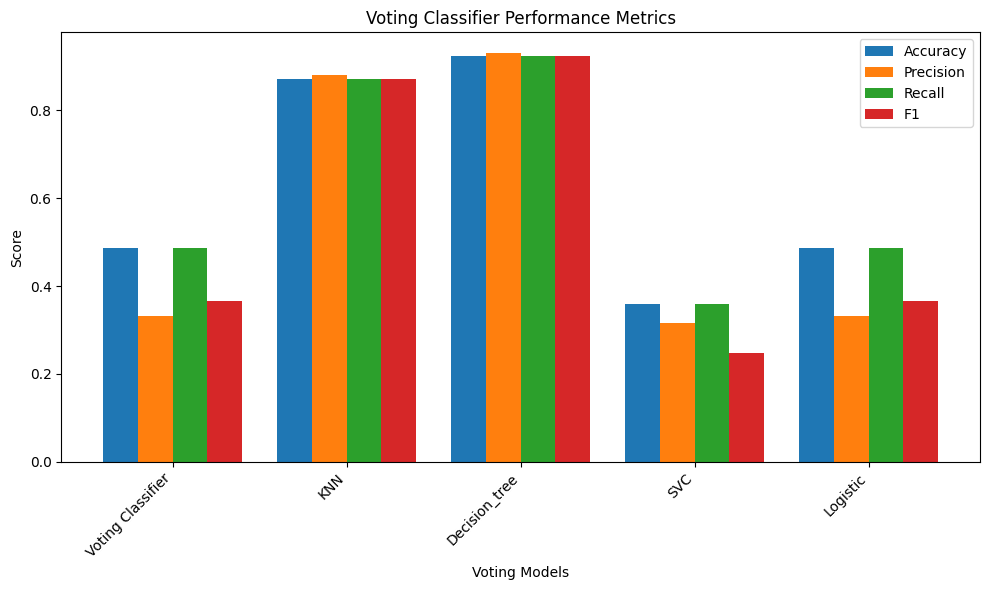

In [ ]:
# Import necessary libraries for classification and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base models
base_models = [
    ('KNN', KNeighborsClassifier()),               # K-Nearest Neighbors
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),  # Decision Tree
    ('SVC', SVC(probability=True, random_state=42)),   # Support Vector Classifier
    ('Logistic', LogisticRegression(random_state=42))  # Logistic Regression
]

# Initialize the Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=base_models, voting='hard')

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store the results for the Voting Classifier
model_results = [{
    'Model': 'Voting Classifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}]

# Evaluate individual models and store the results
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)

    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
    recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
    f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

    # Store the individual results
    model_results.append({
        'Model': name,
        'Accuracy': accuracy_individual,
        'Precision': precision_individual,
        'Recall': recall_individual,
        'F1': f1_individual
    })

# Convert to DataFrame for easier analysis and plotting
results_df = pd.DataFrame(model_results)

# Print the results
print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results_df['Model']))

plt.bar(x - 1.5 * bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x - 0.5 * bar_width, results_df['Precision'], width=bar_width, label='Precision')
plt.bar(x + 0.5 * bar_width, results_df['Recall'], width=bar_width, label='Recall')
plt.bar(x + 1.5 * bar_width, results_df['F1'], width=bar_width, label='F1')

plt.xlabel("Voting Models")
plt.ylabel("Score")
plt.title("Voting Classifier Performance Metrics")
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# **Ensemble Learning - Bootstrap / Bagging.**

In [ ]:
# Import necessary libraries for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Bagging Classifier
# Change 'base_estimator' to 'estimator'
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Using Decision Tree as the base model
    n_estimators=10,      # Number of bootstrap samples
    random_state=42,
    n_jobs=-1             # Use all available cores for parallel processing
)

# Fit the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Bagging Classifier Accuracy: {accuracy:.2f}")
print(f"Bagging Classifier Precision: {precision:.2f}")
print(f"Bagging Classifier Recall: {recall:.2f}")
print(f"Bagging Classifier F1 Score: {f1:.2f}")
print("\n")
# Evaluate an individual Decision Tree without Bagging for comparison
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_individual = decision_tree.predict(X_test)

accuracy_individual = accuracy_score(y_test, y_pred_individual)
precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

print(f"Individual Decision Tree Accuracy: {accuracy_individual:.2f}")
print(f"Individual Decision Tree Precision: {precision_individual:.2f}")
print(f"Individual Decision Tree Recall: {recall_individual:.2f}")
print(f"Individual Decision Tree F1 Score: {f1_individual:.2f}")
print("\n")

Bagging Classifier Accuracy: 0.95
Bagging Classifier Precision: 0.95
Bagging Classifier Recall: 0.95
Bagging Classifier F1 Score: 0.95


Individual Decision Tree Accuracy: 0.92
Individual Decision Tree Precision: 0.93
Individual Decision Tree Recall: 0.92
Individual Decision Tree F1 Score: 0.92




Bagging Classifier Accuracy: 0.95
Bagging Classifier Precision: 0.95
Bagging Classifier Recall: 0.95
Bagging Classifier F1 Score: 0.95


Individual Decision Tree Accuracy: 0.92
Individual Decision Tree Precision: 0.93
Individual Decision Tree Recall: 0.92
Individual Decision Tree F1 Score: 0.92


                Model  Accuracy  Precision    Recall  F1 Score
0  Bagging Classifier  0.948718   0.951282  0.948718  0.948782
1       Decision Tree  0.923077   0.930976  0.923077  0.923991


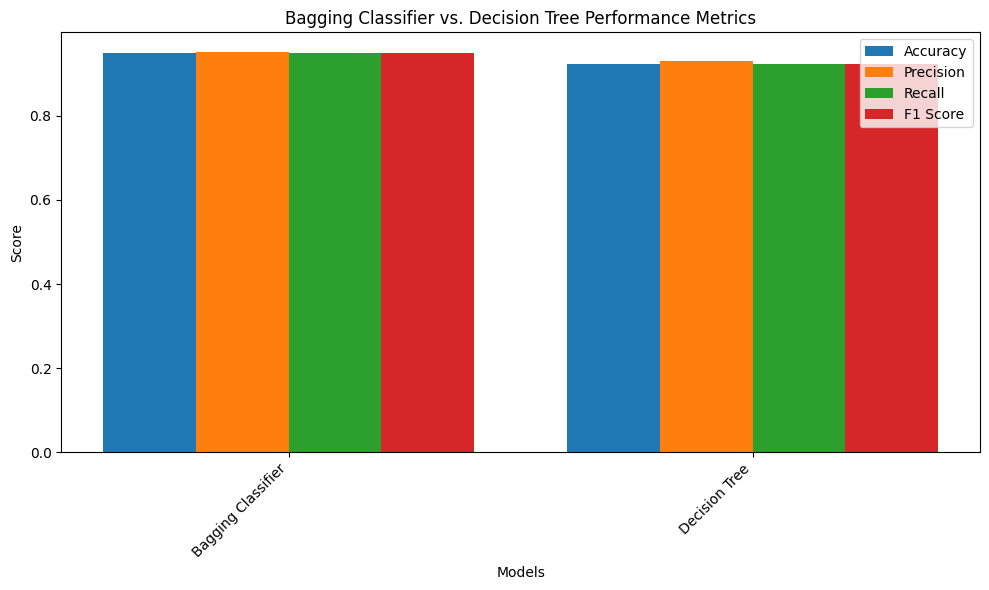

In [ ]:
# Import necessary libraries for classification and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Bagging Classifier using DecisionTreeClassifier as the base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Decision Tree as the base model
    n_estimators=10,      # Number of bootstrap samples
    random_state=42,
    n_jobs=-1             # Use all available cores for parallel processing
)

# Fit the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the Bagging Classifier with classification metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Classifier Accuracy: {accuracy_bagging:.2f}")
print(f"Bagging Classifier Precision: {precision_bagging:.2f}")
print(f"Bagging Classifier Recall: {recall_bagging:.2f}")
print(f"Bagging Classifier F1 Score: {f1_bagging:.2f}")
print("\n")

# Evaluate an individual Decision Tree without Bagging for comparison
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_individual = decision_tree.predict(X_test)

accuracy_individual = accuracy_score(y_test, y_pred_individual)
precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

print(f"Individual Decision Tree Accuracy: {accuracy_individual:.2f}")
print(f"Individual Decision Tree Precision: {precision_individual:.2f}")
print(f"Individual Decision Tree Recall: {recall_individual:.2f}")
print(f"Individual Decision Tree F1 Score: {f1_individual:.2f}")
print("\n")

# Store results in a DataFrame for visualization
results = pd.DataFrame({
    'Model': ['Bagging Classifier', 'Decision Tree'],
    'Accuracy': [accuracy_bagging, accuracy_individual],
    'Precision': [precision_bagging, precision_individual],
    'Recall': [recall_bagging, recall_individual],
    'F1 Score': [f1_bagging, f1_individual]
})

# Print the results DataFrame
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results['Model']))

plt.bar(x - 1.5 * bar_width, results['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x - 0.5 * bar_width, results['Precision'], width=bar_width, label='Precision')
plt.bar(x + 0.5 * bar_width, results['Recall'], width=bar_width, label='Recall')
plt.bar(x + 1.5 * bar_width, results['F1 Score'], width=bar_width, label='F1 Score')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Bagging Classifier vs. Decision Tree Performance Metrics")
plt.xticks(x, results['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# **Ensemble Learning - Random forest**

---



Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Precision: 0.93
Random Forest Classifier Recall: 0.92
Random Forest Classifier F1 Score: 0.92


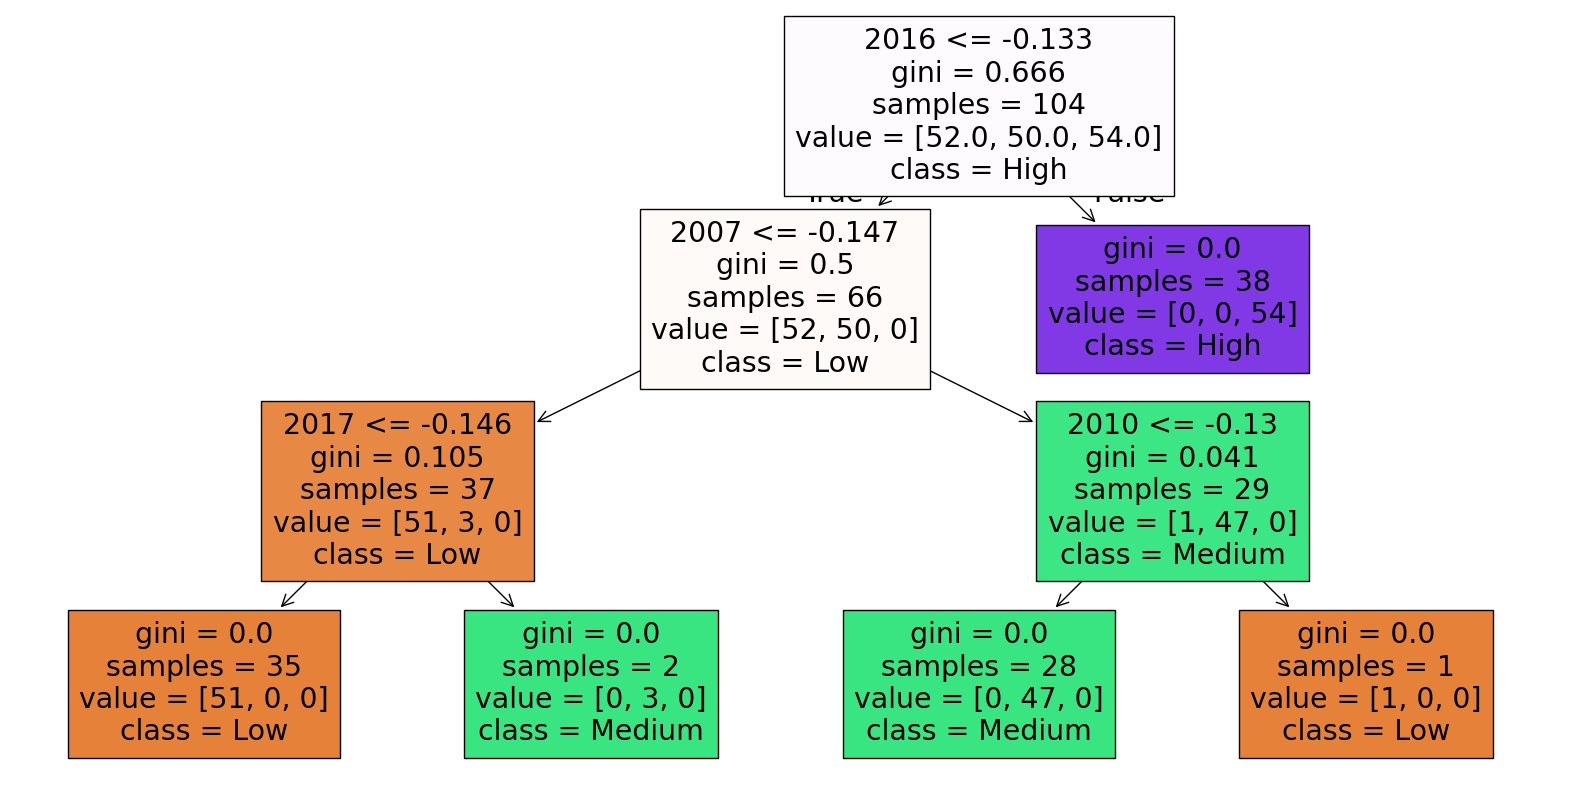

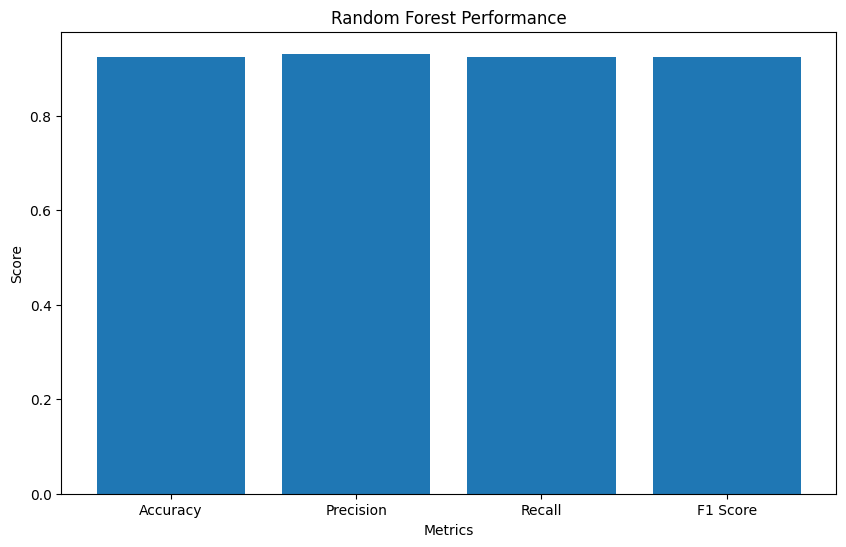

In [ ]:
# Import necessary libraries for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Updated for Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
# Import plot_tree from sklearn.tree
from sklearn.tree import plot_tree
# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_clf.predict(X_test)

# Evaluate the model with classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print(f"Random Forest Classifier Precision: {precision:.2f}")
print(f"Random Forest Classifier Recall: {recall:.2f}")
print(f"Random Forest Classifier F1 Score: {f1:.2f}")

# Visualize a single decision tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest_clf.estimators_[0], feature_names=features.columns, filled=True, class_names=['Low', 'Medium', 'High'])
plt.show()


# Create a DataFrame for the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Generate a chart of the metrics
plt.figure(figsize=(10, 6))
plt.bar(results['Metric'], results['Score'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Random Forest Performance')
plt.show()


Random Forest Accuracy: 0.92
Random Forest Precision: 0.93
Random Forest Recall: 0.92
Random Forest F1 Score: 0.92


Individual Decision Tree Accuracy: 0.92
Individual Decision Tree Precision: 0.93
Individual Decision Tree Recall: 0.92
Individual Decision Tree F1 Score: 0.92


           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.923077   0.930976  0.923077  0.923991
1  Decision Tree  0.923077   0.930976  0.923077  0.923991


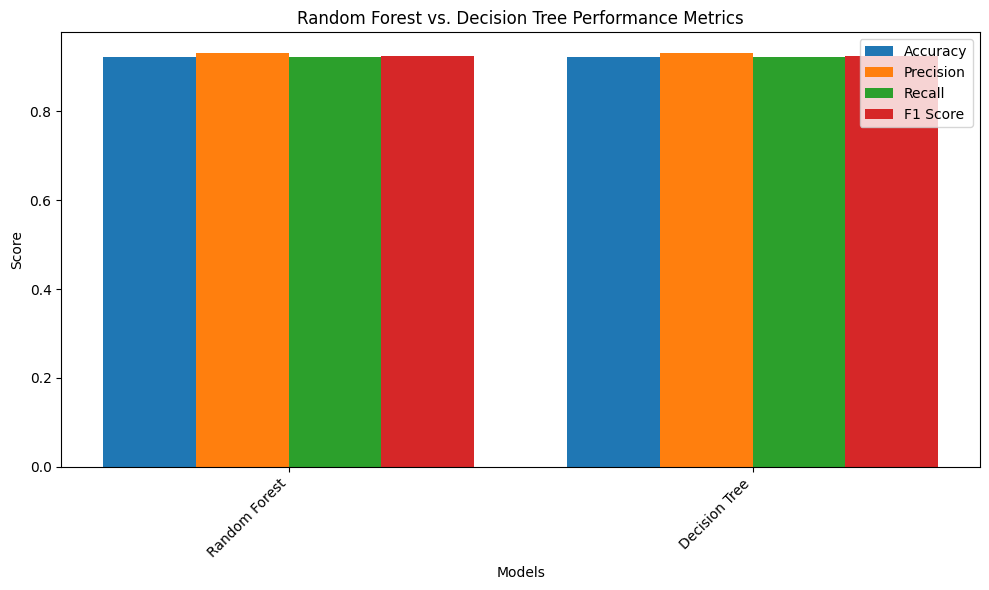

In [ ]:
# Import necessary libraries for classification and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the training data
random_forest_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_clf.predict(X_test)

# Evaluate the RandomForestClassifier with classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1 Score: {f1_rf:.2f}")
print("\n")

# Evaluate an individual Decision Tree for comparison
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_individual = decision_tree.predict(X_test)

accuracy_individual = accuracy_score(y_test, y_pred_individual)
precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

print(f"Individual Decision Tree Accuracy: {accuracy_individual:.2f}")
print(f"Individual Decision Tree Precision: {precision_individual:.2f}")
print(f"Individual Decision Tree Recall: {recall_individual:.2f}")
print(f"Individual Decision Tree F1 Score: {f1_individual:.2f}")
print("\n")

# Store results in a DataFrame for visualization
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_rf, accuracy_individual],
    'Precision': [precision_rf, precision_individual],
    'Recall': [recall_rf, recall_individual],
    'F1 Score': [f1_rf, f1_individual]
})

# Print the results DataFrame
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(results['Model']))

plt.bar(x - 1.5 * bar_width, results['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x - 0.5 * bar_width, results['Precision'], width=bar_width, label='Precision')
plt.bar(x + 0.5 * bar_width, results['Recall'], width=bar_width, label='Recall')
plt.bar(x + 1.5 * bar_width, results['F1 Score'], width=bar_width, label='F1 Score')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Random Forest vs. Decision Tree Performance Metrics")
plt.xticks(x, results['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# **Ensemble Learning - Boosting.**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


           Model  Accuracy  Precision    Recall  F1 Score
0       AdaBoost  0.923077   0.930976  0.923077  0.923991
1            KNN  0.871795   0.881386  0.871795  0.871249
2  Decision_tree  0.923077   0.930976  0.923077  0.923991
3            SVC  0.358974   0.316952  0.358974  0.247409
4       Logistic  0.487179   0.330852  0.487179  0.364936


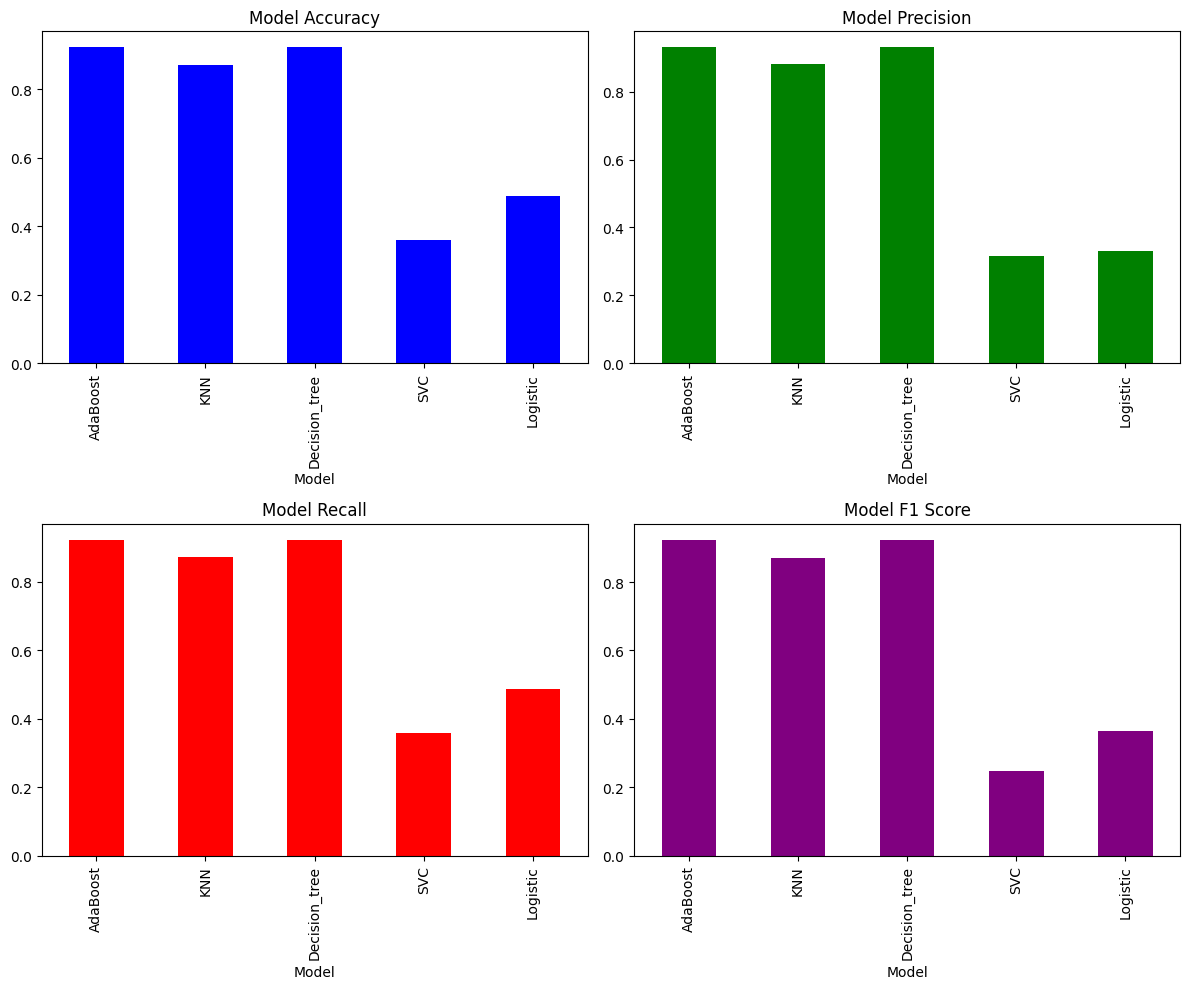

In [ ]:
# Import necessary libraries for classification and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_emissions.csv')

# Prepare the dataset by selecting relevant features and target
# Drop non-numeric and unnecessary columns
features = data.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018'])

# Define target classes based on the 33rd and 66th percentiles
percentiles = np.percentile(data['2018'], [33, 66])
low_threshold, high_threshold = percentiles[0], percentiles[1]

def categorize_emission(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

target = data['2018'].apply(categorize_emission)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values using the mean for each feature
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base classifiers for comparison with AdaBoost
base_models = [
    ('KNN', KNeighborsClassifier()),               # K-Nearest Neighbors
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),  # Decision Tree
    ('SVC', SVC(probability=True, random_state=42)),   # Support Vector Classifier
    ('Logistic', LogisticRegression(random_state=42))  # Logistic Regression
]

# Initialize the AdaBoost Classifier with DecisionTreeClassifier as the weak learner
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=50,  # Number of weak learners
    random_state=42
)

# Fit the AdaBoost model on the training data
boosting_model.fit(X_train, y_train)

# Make predictions with the AdaBoost model
y_pred_boosting = boosting_model.predict(X_test)

# Calculate metrics for AdaBoost
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

# Store the AdaBoost results
boosting_results = {
    'Model': 'AdaBoost',
    'Accuracy': accuracy_boosting,
    'Precision': precision_boosting,
    'Recall': recall_boosting,
    'F1 Score': f1_boosting
}

# Evaluate each base model individually and store the results
results = []
results.append(boosting_results)  # Add AdaBoost results

for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)

    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    precision_individual = precision_score(y_test, y_pred_individual, average='weighted')
    recall_individual = recall_score(y_test, y_pred_individual, average='weighted')
    f1_individual = f1_score(y_test, y_pred_individual, average='weighted')

    # Store the results for each base model
    results.append({
        'Model': name,
        'Accuracy': accuracy_individual,
        'Precision': precision_individual,
        'Recall': recall_individual,
        'F1 Score': f1_individual
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Plot the results for better visualization
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy
results_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax[0, 0], legend=False, color='blue')
ax[0, 0].set_title('Model Accuracy')

# Plot Precision
results_df.plot(x='Model', y='Precision', kind='bar', ax=ax[0, 1], legend=False, color='green')
ax[0, 1].set_title('Model Precision')

# Plot Recall
results_df.plot(x='Model', y='Recall', kind='bar', ax=ax[1, 0], legend=False, color='red')
ax[1, 0].set_title('Model Recall')

# Plot F1 Score
results_df.plot(x='Model', y='F1 Score', kind='bar', ax=ax[1, 1], legend=False, color='purple')
ax[1, 1].set_title('Model F1 Score')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()
